# Time-Series Forecasting with XGBoost

# Import the required libraries

In [ ]:
!gdown 1UPyrvIqB-UCyqGR8wq3IJJsc7ClxQMeZ

Downloading...
From: https://drive.google.com/uc?id=1UPyrvIqB-UCyqGR8wq3IJJsc7ClxQMeZ
To: /content/amazon_stock_price.csv
100% 414k/414k [00:00<00:00, 116MB/s]


In [ ]:
import pandas as pd
df = pd.read_csv('amazon_stock_price.csv')

In [ ]:
df.head()

,date,open,high,low,close,volume
0,1997-05-15,0.1219,0.1250,0.0964,0.0979,1443120000
1,1997-05-16,0.0984,0.0990,0.0854,0.0865,294000000
2,1997-05-19,0.0880,0.0885,0.0812,0.0854,122136000
3,1997-05-20,0.0865,0.0875,0.0818,0.0818,109344000
4,1997-05-21,0.0818,0.0823,0.0688,0.0714,377064000


## Read the Dataset

## Check for and fill missing values

In [ ]:
df.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

### Visualize the 'Close' price in time

<Axes: >

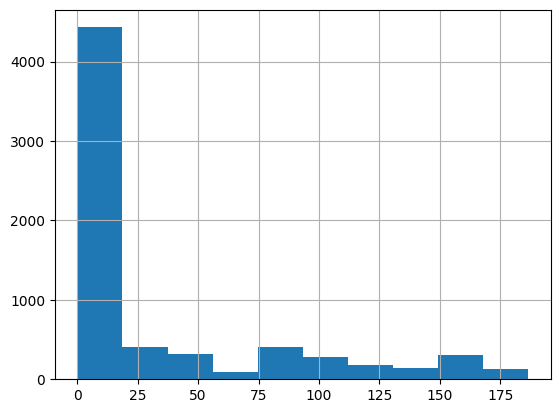

In [ ]:
df['close'].hist()

## Index the dataframe with the date column

In [ ]:
data = df

In [ ]:
data['date'] = pd.to_datetime(data['date'])
data = data.set_index('date')

In [ ]:
data.head()

,open,high,low,close,volume
date,,,,,
1997-05-15,0.1219,0.1250,0.0964,0.0979,1443120000
1997-05-16,0.0984,0.0990,0.0854,0.0865,294000000
1997-05-19,0.0880,0.0885,0.0812,0.0854,122136000
1997-05-20,0.0865,0.0875,0.0818,0.0818,109344000
1997-05-21,0.0818,0.0823,0.0688,0.0714,377064000


In [ ]:
data_copy = data

## Use the values for 'open', 'low', 'high', 'close' and 'volume' from the last 5 days to predict the current value of 'close'.

Check out pandas 'shift' method.

In [ ]:
data = data.sort_values(by='date', ascending=False)
for i in range(1, 5):
  data[f'open from {i} days ago'] = data['open'].shift(i)
data=data.drop('open', axis=1)

for i in range(1, 6):
  data[f'low from {i} days ago'] = data['low'].shift(i)
data=data.drop('low', axis=1)

for i in range(1, 6):
  data[f'high from {i} days ago'] = data['high'].shift(i)
data=data.drop('high', axis=1)

for i in range(1, 6):
  data[f'close from {i} days ago'] = data['close'].shift(i)

for i in range(1, 6):
  data[f'volume from {i} days ago'] = data['volume'].shift(i)
data=data.drop('volume', axis=1)

data.dropna(subset=data.columns,axis=0,inplace=True)

data.head(10)

,close,open from 1 days ago,open from 2 days ago,open from 3 days ago,open from 4 days ago,low from 1 days ago,low from 2 days ago,low from 3 days ago,low from 4 days ago,low from 5 days ago,...,close from 1 days ago,close from 2 days ago,close from 3 days ago,close from 4 days ago,close from 5 days ago,volume from 1 days ago,volume from 2 days ago,volume from 3 days ago,volume from 4 days ago,volume from 5 days ago
date,,,,,,,,,,,,,,,,,,,,,
2023-11-29,146.32,144.76,146.00,145.25,143.55,144.33,145.55,142.81,143.13,144.28,...,146.09,147.03,144.84,146.88,144.52,65814000.0,39924600.0,48294200.0,46822400.0,39603800.0
2023-11-28,147.03,147.85,144.76,146.00,145.25,145.97,144.33,145.55,142.81,143.13,...,146.32,146.09,147.03,144.84,146.88,40610900.0,65814000.0,39924600.0,48294200.0,46822400.0
2023-11-27,147.73,146.98,147.85,144.76,146.00,145.53,145.97,144.33,145.55,142.81,...,147.03,146.32,146.09,147.03,144.84,42711700.0,40610900.0,65814000.0,39924600.0,48294200.0
2023-11-24,146.74,147.53,146.98,147.85,144.76,146.88,145.53,145.97,144.33,145.55,...,147.73,147.03,146.32,146.09,147.03,53762400.0,42711700.0,40610900.0,65814000.0,39924600.0
2023-11-22,146.71,146.70,147.53,146.98,147.85,145.32,146.88,145.53,145.97,144.33,...,146.74,147.73,147.03,146.32,146.09,22378400.0,53762400.0,42711700.0,40610900.0,65814000.0
2023-11-21,143.90,144.57,146.70,147.53,146.98,144.57,145.32,146.88,145.53,145.97,...,146.71,146.74,147.73,147.03,146.32,45669100.0,22378400.0,53762400.0,42711700.0,40610900.0
2023-11-20,146.13,143.91,144.57,146.70,147.53,141.50,144.57,145.32,146.88,145.53,...,143.90,146.71,146.74,147.73,147.03,71226000.0,45669100.0,22378400.0,53762400.0,42711700.0
2023-11-17,145.18,145.13,143.91,144.57,146.70,144.73,141.50,144.57,145.32,146.88,...,146.13,143.90,146.71,146.74,147.73,41951200.0,71226000.0,45669100.0,22378400.0,53762400.0
2023-11-16,142.83,142.66,145.13,143.91,144.57,142.54,144.73,141.50,144.57,145.32,...,145.18,146.13,143.90,146.71,146.74,49636700.0,41951200.0,71226000.0,45669100.0,22378400.0


## Use the last 20% of dates as the test set, and the first 80% as the training set.

In [ ]:
data = data.reset_index()
data.drop('date',axis=1,inplace=True)

In [ ]:
data

,close,open from 1 days ago,open from 2 days ago,open from 3 days ago,open from 4 days ago,low from 1 days ago,low from 2 days ago,low from 3 days ago,low from 4 days ago,low from 5 days ago,...,close from 1 days ago,close from 2 days ago,close from 3 days ago,close from 4 days ago,close from 5 days ago,volume from 1 days ago,volume from 2 days ago,volume from 3 days ago,volume from 4 days ago,volume from 5 days ago
0,146.3200,144.7600,146.0000,145.2500,143.5500,144.3300,145.5500,142.8100,143.1300,144.2800,...,146.0900,147.0300,144.8400,146.8800,144.5200,65814000.0,39924600.0,48294200.0,46822400.0,39603800.0
1,147.0300,147.8500,144.7600,146.0000,145.2500,145.9700,144.3300,145.5500,142.8100,143.1300,...,146.3200,146.0900,147.0300,144.8400,146.8800,40610900.0,65814000.0,39924600.0,48294200.0,46822400.0
2,147.7300,146.9800,147.8500,144.7600,146.0000,145.5300,145.9700,144.3300,145.5500,142.8100,...,147.0300,146.3200,146.0900,147.0300,144.8400,42711700.0,40610900.0,65814000.0,39924600.0,48294200.0
3,146.7400,147.5300,146.9800,147.8500,144.7600,146.8800,145.5300,145.9700,144.3300,145.5500,...,147.7300,147.0300,146.3200,146.0900,147.0300,53762400.0,42711700.0,40610900.0,65814000.0,39924600.0
4,146.7100,146.7000,147.5300,146.9800,147.8500,145.3200,146.8800,145.5300,145.9700,144.3300,...,146.7400,147.7300,147.0300,146.3200,146.0900,22378400.0,53762400.0,42711700.0,40610900.0,65814000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6675,0.0714,0.0719,0.0703,0.0755,0.0812,0.0656,0.0667,0.0729,0.0766,0.0740,...,0.0698,0.0750,0.0792,0.0766,0.0753,235536000.0,318744000.0,173952000.0,91488000.0,69456000.0
6676,0.0818,0.0818,0.0719,0.0703,0.0755,0.0688,0.0656,0.0667,0.0729,0.0766,...,0.0714,0.0698,0.0750,0.0792,0.0766,377064000.0,235536000.0,318744000.0,173952000.0,91488000.0
6677,0.0854,0.0865,0.0818,0.0719,0.0703,0.0818,0.0688,0.0656,0.0667,0.0729,...,0.0818,0.0714,0.0698,0.0750,0.0792,109344000.0,377064000.0,235536000.0,318744000.0,173952000.0
6678,0.0865,0.0880,0.0865,0.0818,0.0719,0.0812,0.0818,0.0688,0.0656,0.0667,...,0.0854,0.0818,0.0714,0.0698,0.0750,122136000.0,109344000.0,377064000.0,235536000.0,318744000.0


Be careful, you can't just use sklearn's train_test_split

In [ ]:
X, Y = data.drop('close',axis=1), data['close']

In [ ]:
X_train = X.iloc[int(len(data)*0.2):,:]
X_test = X.iloc[:int(len(data)*0.2),:]
Y_train = Y[int(len(data)*0.2):]
Y_test = Y[:int(len(data)*0.2)]

## Train and Evaluate the model

In [ ]:
from xgboost import XGBRegressor
model = XGBRegressor()

In [ ]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(Y_test,Y_pred))

2191.6013614817048


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
learning_rate_list = [0.05, 0.1]
max_depth_list = [9, 11]
parameters= {"learning_rate": learning_rate_list,
               "max_depth": max_depth_list}

In [ ]:
xgb_model = XGBRegressor()
xgb_cv=GridSearchCV(xgb_model, parameters, cv=5)
xgb_cv.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [9, 11]})

In [ ]:
print(xgb_cv.best_params_)

{'learning_rate': 0.1, 'max_depth': 9}


In [ ]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit()

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)


In [ ]:
for train_index, test_index in tscv.split(X):
  X_trainfold, X_testfold = X.to_numpy()[train_index], X.to_numpy()[test_index]
  Y_trainfold, Y_testfold = Y[train_index].to_numpy(), Y[test_index].to_numpy()
  model = XGBRegressor(learning_rate=0.1,max_depth=9)
  model.fit(X_trainfold,Y_trainfold)
  Y_predfold=model.predict(X_testfold)
  print(mean_squared_error(Y_testfold,Y_predfold))


1779.8733653270288
20.467548902752146
10.456927381212079
0.11820403354826699
0.017824653569016184
